{'data_root': '/media/data/tanke/mvpose_data/cmu_panoptic',
 'nodes': [1, 15, 12, 3, 12, 14],
 'panels': [1, 6, 9, 14, 16, 19],
 'seq_name': '160422_ultimatum1'}
# gt persons 3


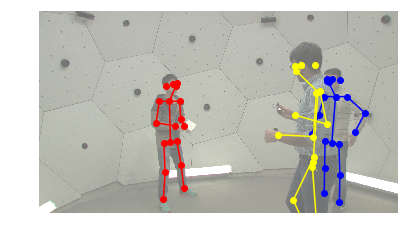

In [4]:
%matplotlib inline
# ---- settings ----
import json
from pprint import pprint
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../samples')
import paf_loader
from os.path import join, isdir
import numpy as np
import cv2
from cselect import color as cs
from time import time
from mvpose import settings

from mvpose.data import cmu_panoptic


params = settings.get_settings(
    max_epi_distance=20, 
    scale_to_mm=10, 
    gp_max_radius=30,
    pp_conflict_overlap=0.8)


root = Settings['CMU']['data_root']
tmp = Settings['tmp']

pprint(Settings['CMU'])

FRAME = 4100
FRAME = 400

panels = Settings['CMU']['panels']
nodes = Settings['CMU']['nodes']

nodes = [0]
panels = [0]
seq_name = '160224_haggling1'

# nodes = [12, 8, 13, 14, 1]
# panels = [15, 5, 18, 19, 1]
#seq_name = '160224_haggling1'
#seq_name = '160906_pizza1'
#seq_name = '160226_mafia1'

Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=FRAME)

print('# gt persons', len(Y))

fig = plt.figure(figsize=(16,12))

colors = ['red', 'blue', 'yellow', 'cyan', 'orange', 
          'teal', 'white', 'cornflowerblue', 'limegreen']

# Edges between joints in the body skeleton
body_edges = np.array([[1,2],[1,4],[4,5],[5,6],[1,3],[3,7],[7,8],[8,9],[3,13],[13,14],[14,15],[1,10],[10,11],[11,12]])-1

for idx, cam in enumerate(Calib):
    ax = fig.add_subplot(2,3,1+idx)
    ax.axis('off')
    im = Im[idx]
    
    #im = cam.undistort(im)
    
    h,w,_ = im.shape
    ax.imshow(im, alpha=0.6)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, points3d_weighted in Y:
        pts3d = points3d_weighted[:, 0:3].astype('float32')
        pts2d = cam.projectPoints(pts3d)
        pts2dT = pts2d.transpose()
        ax.scatter(pts2d[:, 0], pts2d[:, 1], color=colors[pid])
        for edge in body_edges:
            ax.plot(pts2dT[0, edge], pts2dT[1, edge],
                    color=colors[pid])
    
plt.tight_layout()
plt.show()